# PROCESO DE LIMPIEZA E IMPUTACION

IMPORTACIÓN DE LIBRERIAS

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

LEER LA BASE DE DATOS Y GUARDARLA EN LA VARIABLE DF

In [2]:
data  = pd.read_excel(r"C:\Users\Rox\Documents\ESPECIALIZACION\GESTION\DatosClinicos2020.xlsx")
data

,Study ID,Patient ID,Sample ID,Age,Alkylating Agent Treatment,All therapy at MSKCC,Anthracycline Treatment,Antimetobolite Treatment,Cancer Type,Cancer Type Detailed,...,Cumulative Exposure to Taxane,Cumulative Exposure to Topoisomerase II Inhibitor,Cumulative Exposure to Topoisomerase I Inhibitor,Time from Diagnosis,Time to Blood Draw from Treatment,TMB (nonsynonymous),Topoisomerase II Inhibitor Treatment,Topoisomerase I Inhibitor Treatment,Treatment Status,Radiation Therapy
0,msk_ch_2020,P-0000004,P-0000004-N01,397399025,Yes,No,NaN,Yes,Breast Cancer,Invasive Breast Carcinoma,...,NaN,NaN,NaN,991.0,609.0,0.066667,NaN,NaN,Unknown,Yes
1,msk_ch_2020,P-0000015,P-0000015-N01,4444079208,NaN,No,NaN,Yes,Breast Cancer,Invasive Breast Carcinoma,...,NaN,NaN,NaN,2558.0,5.0,NaN,NaN,NaN,Unknown,No
2,msk_ch_2020,P-0000023,P-0000023-N01,6131964493,Yes,No,NaN,Yes,Mesothelioma,Peritoneal Mesothelioma,...,NaN,NaN,NaN,245.0,166.0,NaN,NaN,NaN,Unknown,NaN
3,msk_ch_2020,P-0000024,P-0000024-N01,6134428406,NaN,No,NaN,NaN,Endometrial Cancer,Other Uterine Tumor,...,2nd tertile,NaN,NaN,6313.0,91.0,NaN,NaN,NaN,Unknown,NaN
4,msk_ch_2020,P-0000025,P-0000025-N01,7267350769,No,Yes,No,No,Endometrial Cancer,Other Uterine Tumor,...,3rd tertile,No treatment,No treatment,1161.0,1097.0,NaN,No,No,Treated,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,msk_ch_2020,P-0031337,P-0031337-N01,7275016785,NaN,No,NaN,NaN,Non-Small Cell Lung Cancer,Atypical Lung Carcinoid,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Unknown,NaN
24142,msk_ch_2020,P-0031338,P-0031338-N01,5763723373,NaN,No,NaN,NaN,Pancreatic Cancer,Intraductal Papillary Mucinous Neoplasm,...,NaN,NaN,NaN,338.0,NaN,0.033333,NaN,NaN,Unknown,NaN
24143,msk_ch_2020,P-0031340,P-0031340-N01,6674332428,NaN,No,NaN,NaN,Non-Small Cell Lung Cancer,Atypical Lung Carcinoid,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Unknown,NaN
24144,msk_ch_2020,P-0031341,P-0031341-N01,6473100281,NaN,No,NaN,NaN,Soft Tissue Sarcoma,Angiosarcoma,...,NaN,NaN,NaN,0.0,NaN,0.066667,NaN,NaN,Unknown,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Study ID                                           24146 non-null  object 
 1   Patient ID                                         24146 non-null  object 
 2   Sample ID                                          24146 non-null  object 
 3   Age                                                24146 non-null  int64  
 4   Alkylating Agent Treatment                         11111 non-null  object 
 5   All therapy at MSKCC                               24146 non-null  object 
 6   Anthracycline Treatment                            10898 non-null  object 
 7   Antimetobolite Treatment                           11975 non-null  object 
 8   Cancer Type                                        24037 non-null  object 
 9   Cancer

In [4]:
data.shape

(24146, 53)

 Considerando el objetivo de identificar las edades óptimas para la detección de diversos tipos de cáncer, comenzamos analizando la columna Age


In [5]:
# Revisión de la distribución de la columna 'Age'
print(data['Age'].describe())

count    2.414600e+04
mean     5.425618e+09
std      2.147746e+09
min      8.000000e+00
25%      4.608967e+09
50%      5.956468e+09
75%      6.905886e+09
max      9.949349e+09
Name: Age, dtype: float64


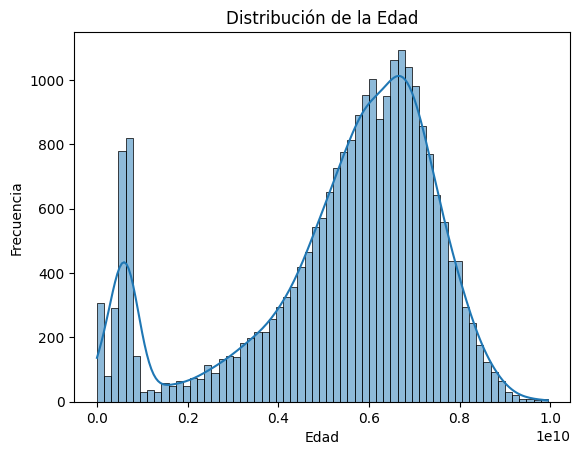

In [6]:
# Visualización de la distribución de la edad
sns.histplot(data['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
# Identificación de posibles valores atípicos
print("Valores únicos en la columna 'Age':", data['Age'].unique())

Valores únicos en la columna 'Age': [ 397399025 4444079208 6131964493 ... 4898562622  720739212 7275016785]


Como se puede observar, la edad aparece con valores muy grandes que no son congruentes, realemente se deben seleccionar los 2 primeros numeros

In [8]:
# Convertimos los valores de la columna 'Age' a cadena, extraemos los dos primeros caracteres,
# y luego convertimos el resultado de nuevo a números enteros, actualizando la columna 'Age'
data['Age'] = data['Age'].astype(str).str[:2].astype(int)

# Verificamos las primeras filas para asegurarnos de que la columna 'Age' se ha actualizado correctamente.
print(data['Age'].head())

0    39
1    44
2    61
3    61
4    72
Name: Age, dtype: int32


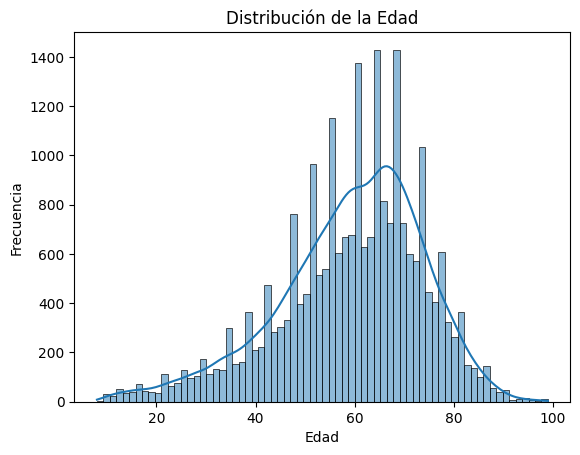

In [9]:
# Visualización de la distribución de la edad
sns.histplot(data['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Tratamiento de valores faltantes (NaN)

In [10]:
# Identificamos las columnas con valores faltantes y su cantidad
print(data.isnull().sum())

Study ID                                                 0
Patient ID                                               0
Sample ID                                                0
Age                                                      0
Alkylating Agent Treatment                           13035
All therapy at MSKCC                                     0
Anthracycline Treatment                              13248
Antimetobolite Treatment                             12171
Cancer Type                                            109
Cancer Type Detailed                                   109
Carboplatin Treatment                                13147
Chemotherapy Treatment                                9746
Cisplatin Treatment                                  13339
Cytotoxic Chemotherapy Treatment                     10743
EQD Tertiles                                         11953
Folic Acid Analog Treatment                          13558
Immunotherapy Treatment                              133

Para el análisis enfocado en identificar las edades óptimas para la detección de diversos tipos de cáncer y apoyar campañas de prevención y detección, es fundamental centrarse en las columnas que aportan información directamente relevante a este objetivo.




In [11]:
# Definimos las columnas que deseamos conservar
columnas_a_conservar = ['Study ID', 'Patient ID', 'Sample ID', 'Age', 'Cancer Type', 'Cancer Type Detailed', 'Race',
                        'Sex', 'Smoking Status', 'Time from Diagnosis', 'Treatment Status']

# Actualizamos el DataFrame para conservar solo las columnas seleccionadas
data = data[columnas_a_conservar]

# Verificamos las primeras filas para asegurarnos de que solo contenga las columnas deseadas
data.head()

,Study ID,Patient ID,Sample ID,Age,Cancer Type,Cancer Type Detailed,Race,Sex,Smoking Status,Time from Diagnosis,Treatment Status
0,msk_ch_2020,P-0000004,P-0000004-N01,39,Breast Cancer,Invasive Breast Carcinoma,White,Female,Never smoker,991.0,Unknown
1,msk_ch_2020,P-0000015,P-0000015-N01,44,Breast Cancer,Invasive Breast Carcinoma,White,Female,Never smoker,2558.0,Unknown
2,msk_ch_2020,P-0000023,P-0000023-N01,61,Mesothelioma,Peritoneal Mesothelioma,White,Male,Never smoker,245.0,Unknown
3,msk_ch_2020,P-0000024,P-0000024-N01,61,Endometrial Cancer,Other Uterine Tumor,White,Female,Former Smoker,6313.0,Unknown
4,msk_ch_2020,P-0000025,P-0000025-N01,72,Endometrial Cancer,Other Uterine Tumor,White,Female,Former Smoker,1161.0,Treated


In [12]:
# Identificamos las columnas necesarias con valores faltantes y su cantidad
print(data.isnull().sum())

Study ID                   0
Patient ID                 0
Sample ID                  0
Age                        0
Cancer Type              109
Cancer Type Detailed     109
Race                    1065
Sex                        0
Smoking Status           932
Time from Diagnosis        1
Treatment Status           0
dtype: int64


<Axes: >

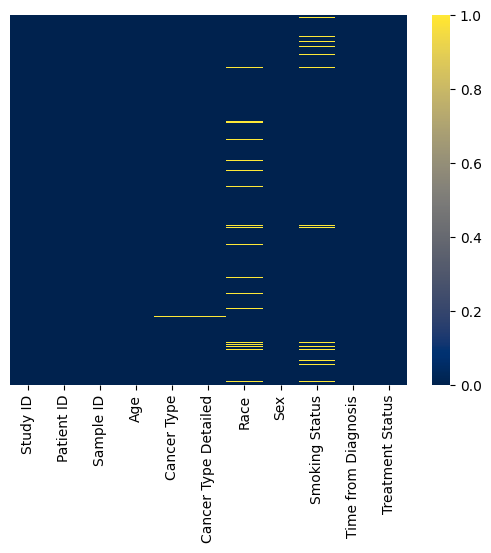

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='cividis')

In [14]:
# Calculamos el número de valores únicos en cada columna seleccionada
unicos_por_columna = data[columnas_a_conservar].nunique()

# Mostramos el número de valores únicos por columna
print(unicos_por_columna)

Study ID                    1
Patient ID              24146
Sample ID               24146
Age                        91
Cancer Type                49
Cancer Type Detailed       56
Race                        4
Sex                         2
Smoking Status              3
Time from Diagnosis      4871
Treatment Status            3
dtype: int64


In [15]:
# Mostramos la frecuencia de cada valor único en cada columna
for columna in columnas_a_conservar:
    print(f"Frecuencias para la columna {columna}:\n{data[columna].value_counts()}\n")


Frecuencias para la columna Study ID:
Study ID
msk_ch_2020    24146
Name: count, dtype: int64

Frecuencias para la columna Patient ID:
Patient ID
P-0000004    1
P-0020108    1
P-0020117    1
P-0020116    1
P-0020115    1
            ..
P-0009646    1
P-0009645    1
P-0009644    1
P-0009643    1
P-0031342    1
Name: count, Length: 24146, dtype: int64

Frecuencias para la columna Sample ID:
Sample ID
P-0000004-N01    1
P-0020108-N01    1
P-0020117-N01    1
P-0020116-N01    1
P-0020115-N01    1
                ..
P-0009646-N01    1
P-0009645-N01    1
P-0009644-N01    1
P-0009643-N01    1
P-0031342-N01    1
Name: count, Length: 24146, dtype: int64

Frecuencias para la columna Age:
Age
66    816
65    750
68    748
70    724
67    724
     ... 
98      7
96      5
99      3
97      2
8       1
Name: count, Length: 91, dtype: int64

Frecuencias para la columna Cancer Type:
Cancer Type
Breast Cancer                            3584
Non-Small Cell Lung Cancer               3559
Colorectal Cance

Despues de tener información de cada una de las columnas y de los valores faltantes identificamos que las columnas de cancer_type y Cancer_Type_Detailed tienen la misma cantidad por lo tanto analizamos si son de las mismas filas y se procede a eliminar.

In [16]:
# Identificamos filas donde ambos 'Cancer Type' y 'Cancer Type Detailed' tienen datos faltantes
filas_con_datos_faltantes_simultaneos = data[data['Cancer Type'].isnull() & data['Cancer Type Detailed'].isnull()]

# Contamos cuántas filas tienen esta condición
numero_de_filas = filas_con_datos_faltantes_simultaneos.shape[0]

print(f"Número de filas donde ambos 'Cancer Type' y 'Cancer Type Detailed' tienen datos faltantes: {numero_de_filas}")


Número de filas donde ambos 'Cancer Type' y 'Cancer Type Detailed' tienen datos faltantes: 109


In [17]:
# Eliminamos filas donde ambos 'Cancer Type' y 'Cancer Type Detailed' tienen datos faltantes
#Utilizando el argumento how='all' en el método .dropna(), nos aseguramos
# que solo se eliminen las filas donde ambos campos son nulos simultáneamente
data = data.dropna(subset=['Cancer Type', 'Cancer Type Detailed'], how='all')

# Verificamos el tamaño del DataFrame después de la eliminación para confirmar
print("Tamaño después de eliminar filas con datos faltantes en 'Cancer Type' y 'Cancer Type Detailed':", data.shape)


Tamaño después de eliminar filas con datos faltantes en 'Cancer Type' y 'Cancer Type Detailed': (24037, 11)


In [18]:
# Revisamos las columnas para identificar los valores faltantes y su cantidad
print(data.isnull().sum())

Study ID                   0
Patient ID                 0
Sample ID                  0
Age                        0
Cancer Type                0
Cancer Type Detailed       0
Race                    1061
Sex                        0
Smoking Status           925
Time from Diagnosis        1
Treatment Status           0
dtype: int64


Continuando con la columna Race y Smoking Status se optó por reemplazar los valores faltantes con "Unknown".

Al utilizar "Unknown", se mantiene la neutralidad sin asignar arbitrariamente a los individuos a una categoría racial específica para la cual no se dispone de datos. Esto evita introducir sesgos potenciales en el análisis relacionados con suposiciones incorrectas sobre la raza de los participantes.

In [19]:
# Reemplazamos los NA/NaN en 'Race' con el valor 'Unknown'
data['Race'].fillna('Unknown', inplace=True)
# Reemplazamos los NA/NaN en 'Smoking Status' con el valor 'Unknown'
data['Smoking Status'].fillna('Unknown', inplace=True)

# Verificamos si aún hay valores NA/NaN en 'Race'
print(data.isnull().sum())

Study ID                0
Patient ID              0
Sample ID               0
Age                     0
Cancer Type             0
Cancer Type Detailed    0
Race                    0
Sex                     0
Smoking Status          0
Time from Diagnosis     1
Treatment Status        0
dtype: int64


C:\Users\Rox\AppData\Local\Temp\ipykernel_1288\3036757949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Race'].fillna('Unknown', inplace=True)
C:\Users\Rox\AppData\Local\Temp\ipykernel_1288\3036757949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Para la columna Time from Diagnosis que es un solo dato faltante, se optó por imputar con la mediana ya que ella no se ve afectada por los valores atípicos.

In [20]:
# Imputación con la mediana para 'Time from Diagnosis'
median_value = data['Time from Diagnosis'].median()
data['Time from Diagnosis'].fillna(median_value, inplace=True)

# Verificamos si aún hay valores NA/NaN en 'Time from Diagnosis'
print(data.isnull().sum())

Study ID                0
Patient ID              0
Sample ID               0
Age                     0
Cancer Type             0
Cancer Type Detailed    0
Race                    0
Sex                     0
Smoking Status          0
Time from Diagnosis     0
Treatment Status        0
dtype: int64


C:\Users\Rox\AppData\Local\Temp\ipykernel_1288\2724515763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Time from Diagnosis'].fillna(median_value, inplace=True)


# EXPORTAMOS LA DATA LIMPIA

In [21]:
data.to_csv("dataLimpia.csv")

# VISUALIZACION DE DATOS E INSIGHTS

Ahora arrojaremos algunas graficas de los datos que tenemos ya limpios, para confirmar que despues de la imputacion no se altero el comportamiento de los datos

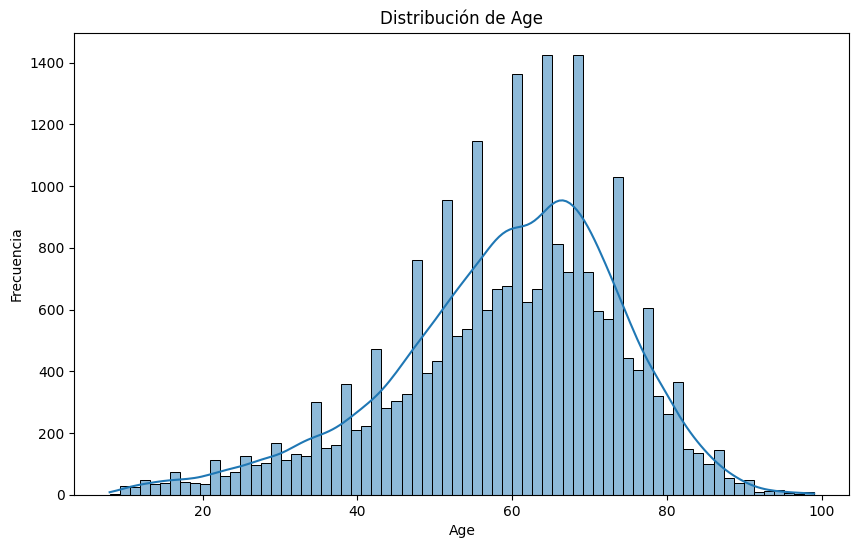

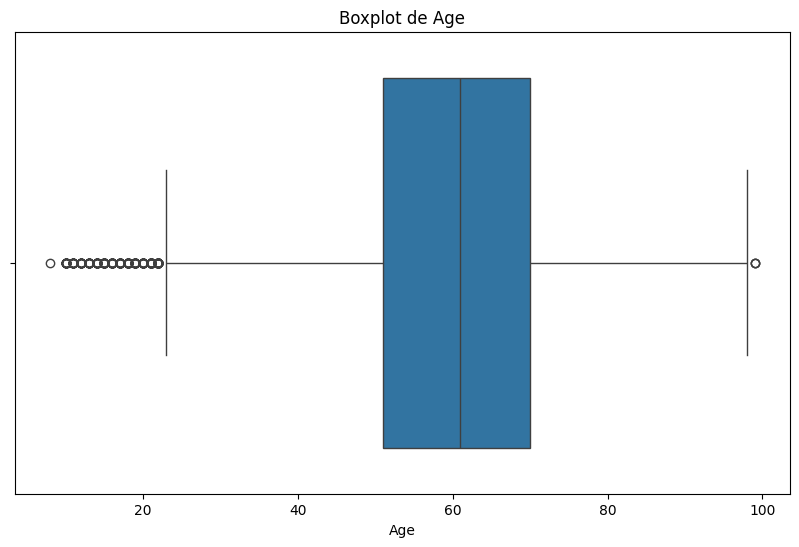

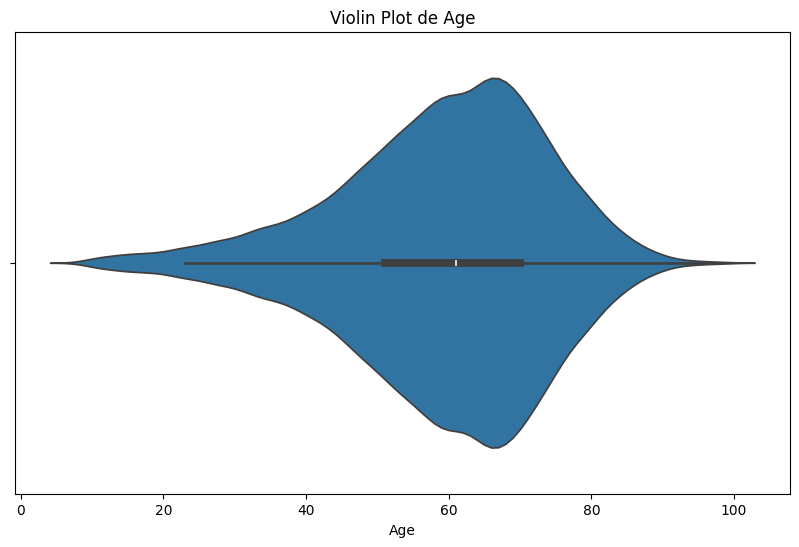

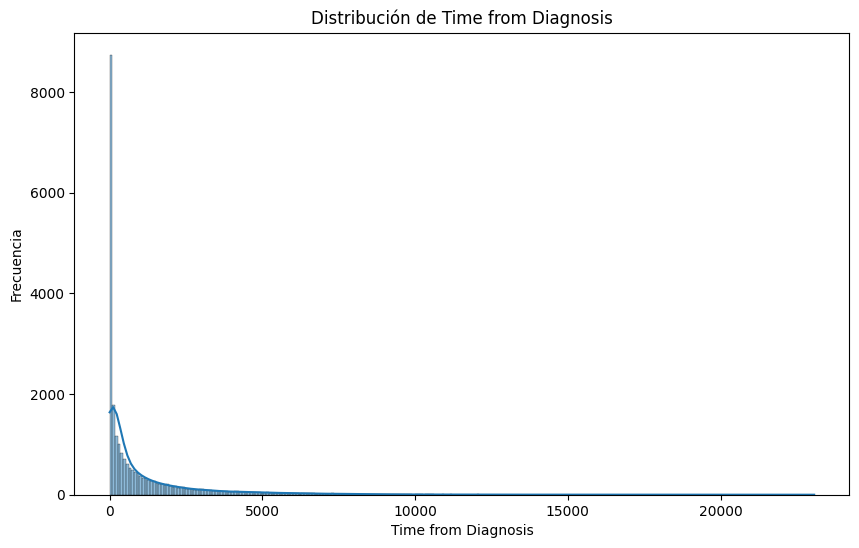

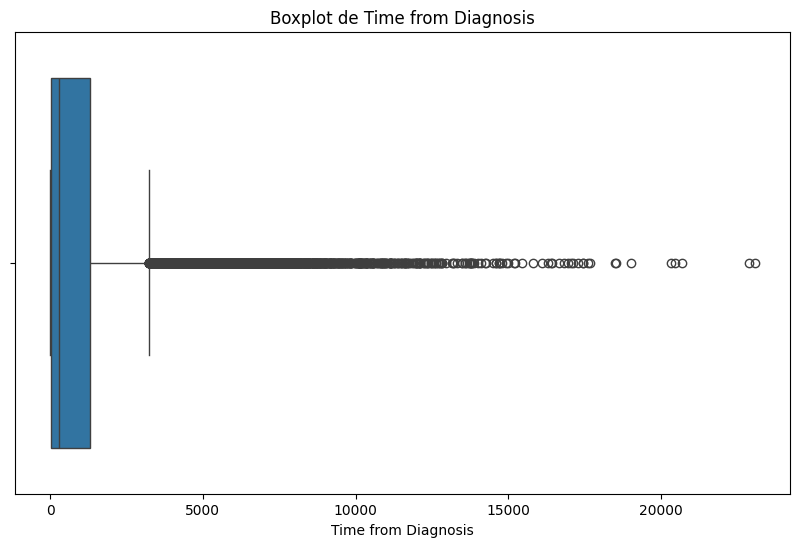

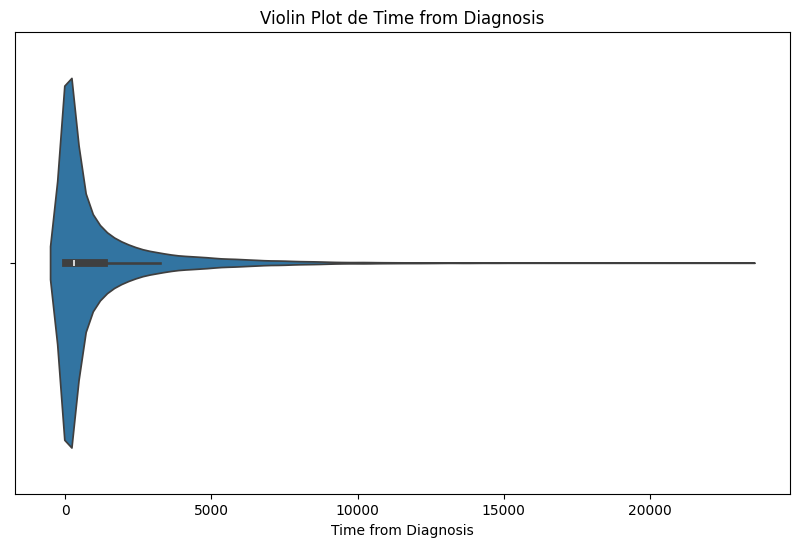

In [22]:
# 'columnas_numericas' contiene las columnas numéricas de tu DataFrame
columnas_numericas = ['Age', 'Time from Diagnosis']  # Ajusta esta lista según tus necesidades

for columna in columnas_numericas:
    # Saltamos la generación de gráficos si la columna tiene valores no numéricos
    if not pd.api.types.is_numeric_dtype(data[columna]):
        continue

    # Histograma y KDE para la columna numérica
    plt.figure(figsize=(10, 6))
    sns.histplot(data[columna].dropna(), kde=True)  # Usamos dropna() para excluir valores nulos
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para la columna numérica
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

    # Violin Plot para la columna numérica
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[columna])
    plt.title(f'Violin Plot de {columna}')
    plt.show()

El histograma muestra la distribución de las edades de los pacientes, se puede observar que la distribución de las edades es aproximadamente normal pero ligeramente sesgada hacia la derecha, lo que indica que hay más pacientes mayores en la muestra comparado con pacientes jóvenes. La curva de densidad (línea azul) sugiere una distribución bimodal, con un primer pico alrededor de los 50-60 años y un segundo pico menos pronunciado cerca de los 70 años.

Los puntos fuera de los bigotes indican valores "atípicos", en este caso, hay varios pacientes de edades inferiores a 20 y mayores a 90 que se consideran outliers lo que significa que la mayoría de los pacientes están en el rango de edad intermedio, con menos pacientes en los extremos de la distribución



Los gráficos de tiempo de diagnostico muestran que la mayoría de los pacientes fueron diagnosticados recientemente. Hay una rápida caída en la frecuencia a medida que aumenta el tiempo desde el diagnóstico, lo que indica que hay muy pocos pacientes con un diagnóstico a largo plazo en la muestra.

La distribución es claramente asimétrica, con una cola larga hacia la derecha. Esto sugiere que, si bien la mayoría de los diagnósticos son recientes, algunos casos han sido manejados por un periodo de tiempo mucho más largo o puede indicar casos crónicos, supervivientes a largo plazo, o posiblemente errores en la recopilación de datos.

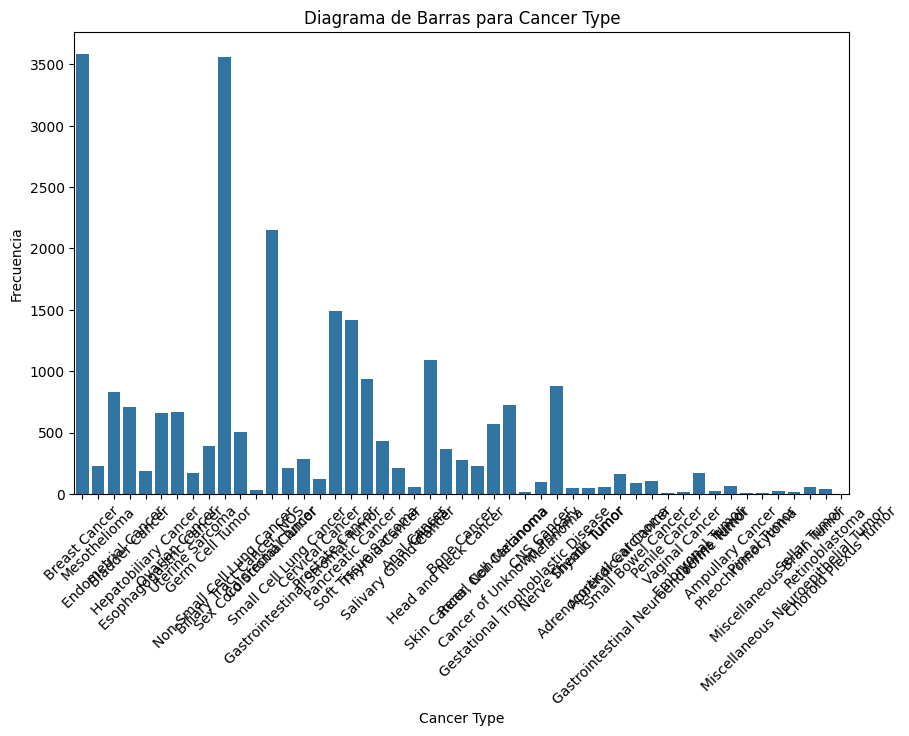

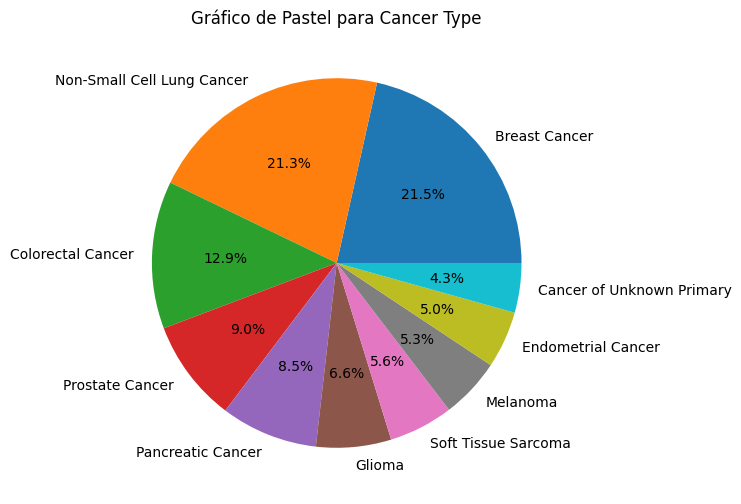

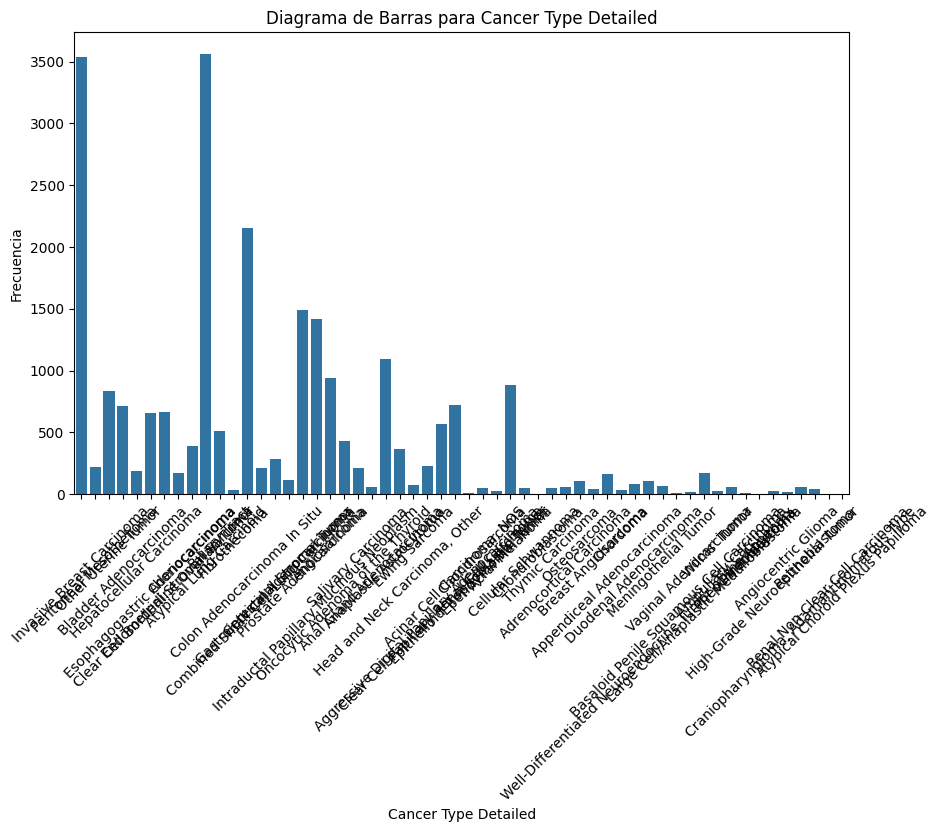

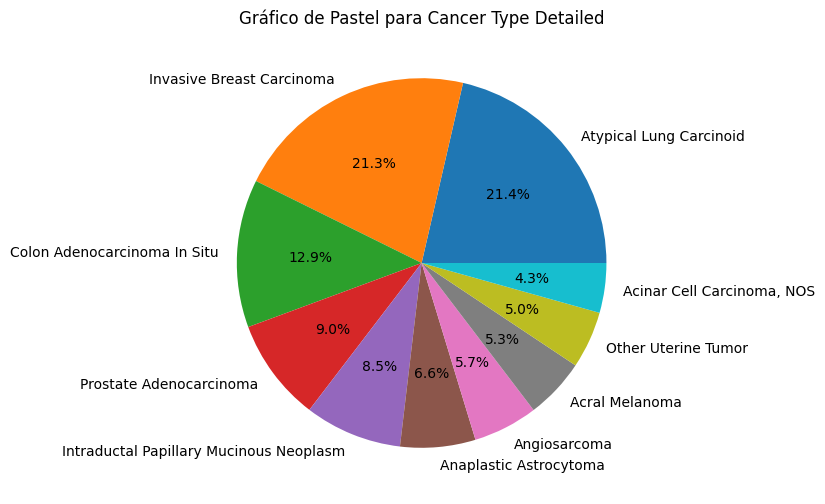

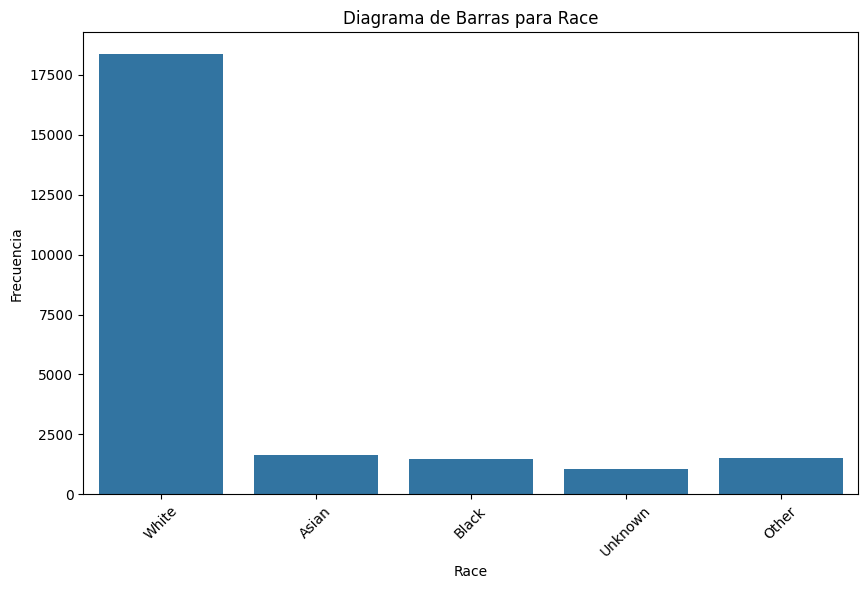

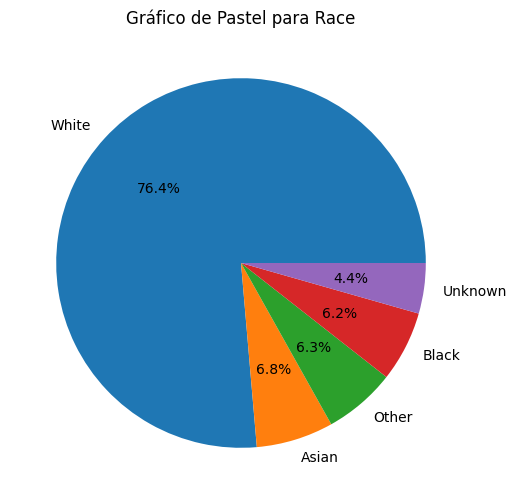

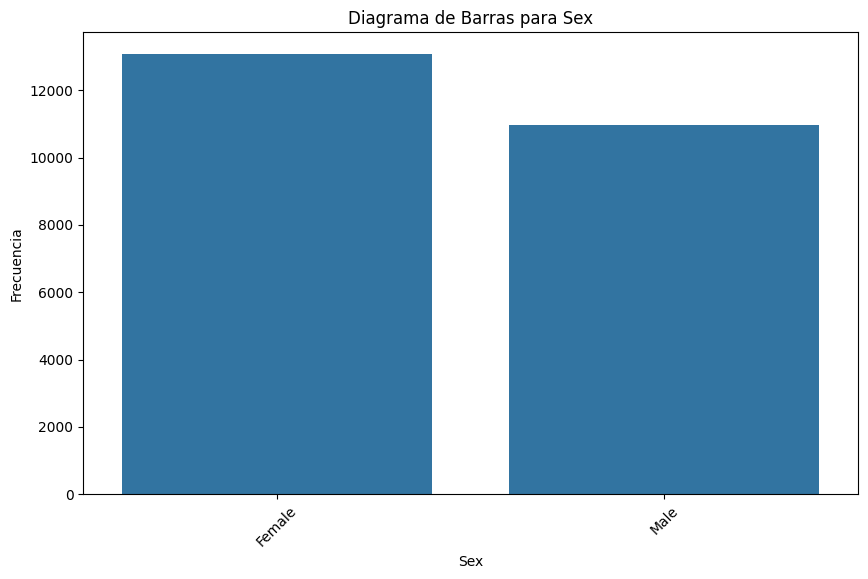

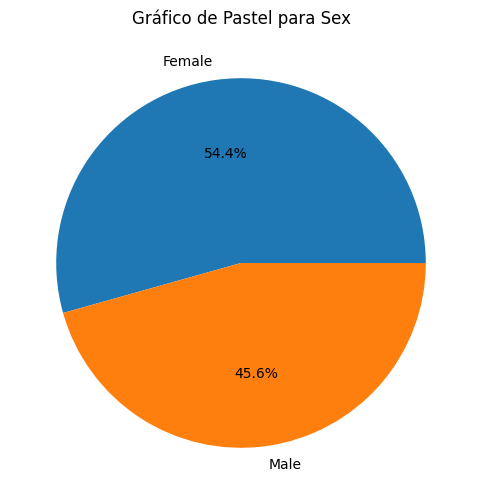

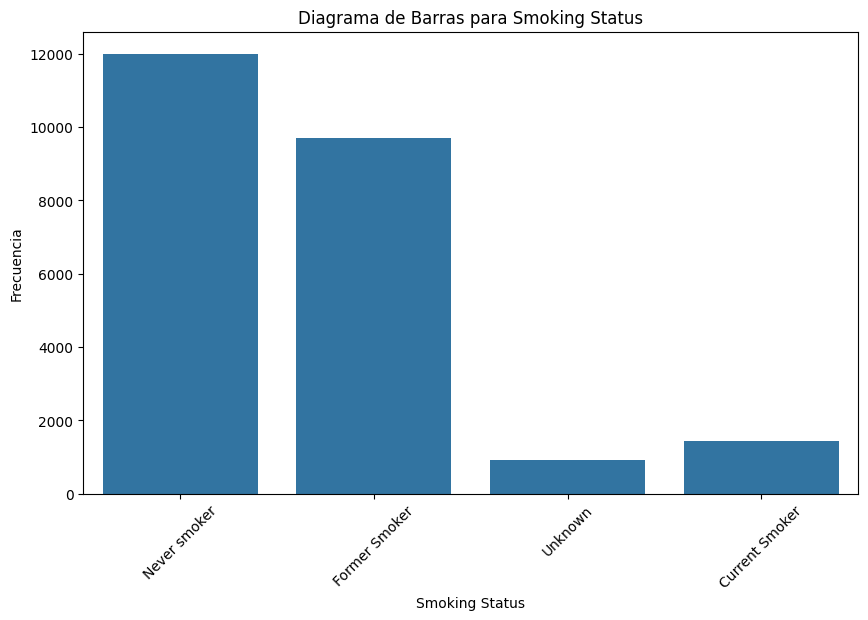

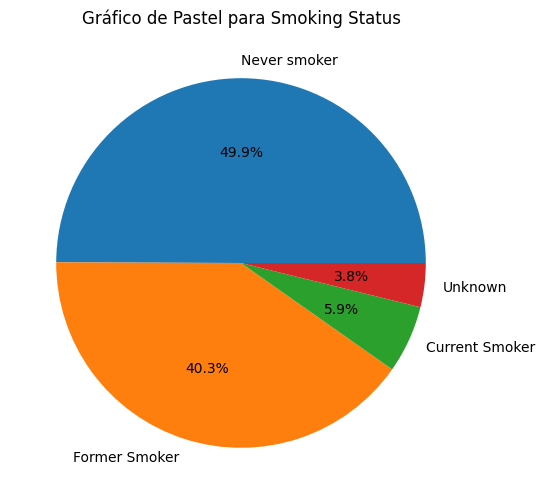

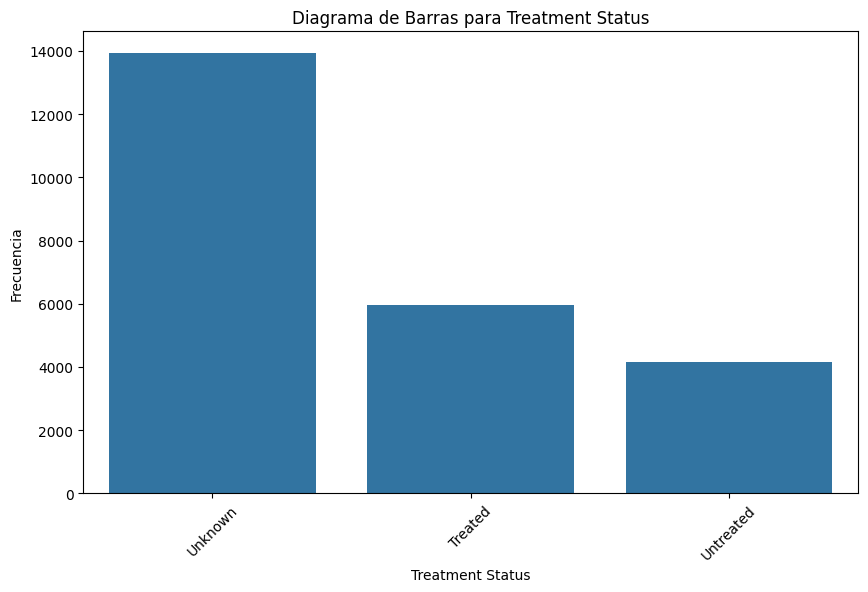

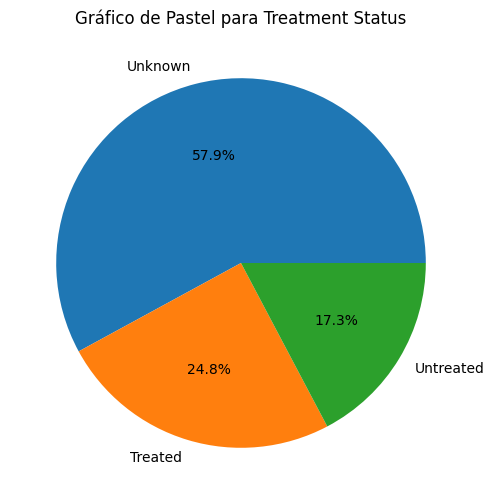

In [23]:
non_numeric_columns = ['Cancer Type', 'Cancer Type Detailed', 'Race', 'Sex', 'Smoking Status', 'Treatment Status']

for column in non_numeric_columns:
    # Gráfico de barras para la columna
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Diagrama de Barras para {column}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de pastel para la columna
    # Limitamos a los 10 valores más comunes para claridad
    top_values = data[column].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    top_values.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Gráfico de Pastel para {column}')
    plt.ylabel('')
    plt.show()

* El cáncer de mama (Breast Cancer) y el cáncer de pulmón no microcítico (Non-Small Cell Lung Cancer) son los más comunes, cada uno con aproximadamente un 21% del total. El cáncer colorrectal (Colorectal Cancer) sigue siendo un tipo significativo, representando cerca del 13%.

* Los tipos de cáncer con porcentajes más bajos incluyen el cáncer de próstata (Prostate Cancer), cáncer pancreático (Pancreatic Cancer), glioma, cáncer de tejido blando (Soft Tissue Sarcoma), melanoma y cáncer endometrial (Endometrial Cancer). Cada uno de estos representa entre un 5% y un 9%.

* Hay también una categoría para el cáncer de origen primario desconocido (Cancer of Unknown Primary), que representa aproximadamente un 4.3% de los casos.

* Los subtipos de cáncer más representados son el "Invasive Breast Carcinoma" y el "Atypical Lung Carcinoid", cada uno constituyendo aproximadamente un 21% del total de casos.

* El "Colon Adenocarcinoma In Situ" también es un subtipo significativo, representando alrededor del 13% de los casos. Subtipos como el "Prostate Adenocarcinoma" y el "Intraductal Papillary Mucinous Neoplasm" también son relativamente comunes, cada uno abarcando cerca del 9% y 8.5% respectivamente.


* Para la "Raza" la categoría "White" (Blanca) constituyen la mayoría de los casos en esta muestra.

* Las categorías "Asian" (Asiáticos), "Black" (Negros), "Unknown" (Desconocido) y "Other" (Otras) tienen menos individuos de estos grupos raciales en la muestra o que están menos representados.

* La categoría "Unknown" indica que los datos no se recopilaron y la presencia de una categoría "Other" sugiere que el conjunto de datos reconoce la existencia de grupos raciales que no se ajustan a las categorías estándar listadas.

Es importante señalar que la desproporción entre "White" y las otras categorías podría reflejar la demografía de la población de pacientes estudiada, sesgos en la recopilación de datos o en el acceso a la atención médica.

* Aproximadamente el 54.4% de los casos son femeninos y el 45.6% son masculinos

* La barra correspondiente a "Never Smoker" es la más alta, lo que indica que la mayoría de los individuos en la muestra nunca han fumado.
* La barra de "Former Smoker" es la siguiente en altura, sugiriendo que un número considerable de personas ha fumado en el pasado pero ya no lo hace.
* "Unknown" indica individuos cuyo estatus de fumador no se ha registrado.
* "Current Smoker" tiene la barra más baja, indicando que hay menos fumadores actuales en la muestra en comparación con las otras categorías.


* El segmento más grande, "Unknown" con un 57.9%, sugiere que para más de la mitad de los casos en la muestra, el estado del tratamiento no está claro o no ha sido registrado.

* La categoría "Treated" constituye un 24.8%, lo que indica que aproximadamente un cuarto de los pacientes en la muestra han recibido tratamiento. Por otro lado, "Untreated" representa un 17.3%, mostrando que una proporción menor de los pacientes no ha sido tratada.

La alta proporción de estados de tratamiento desconocido podría afectar la interpretación del análsis.

Se muestra de otra manera los análisis anteriores pero buscando visualizar la distribución de la edad y cómo se distribuye esta variable entre varias categorías (tipos de cáncer), y además, cómo se compara entre dos grupos (géneros).

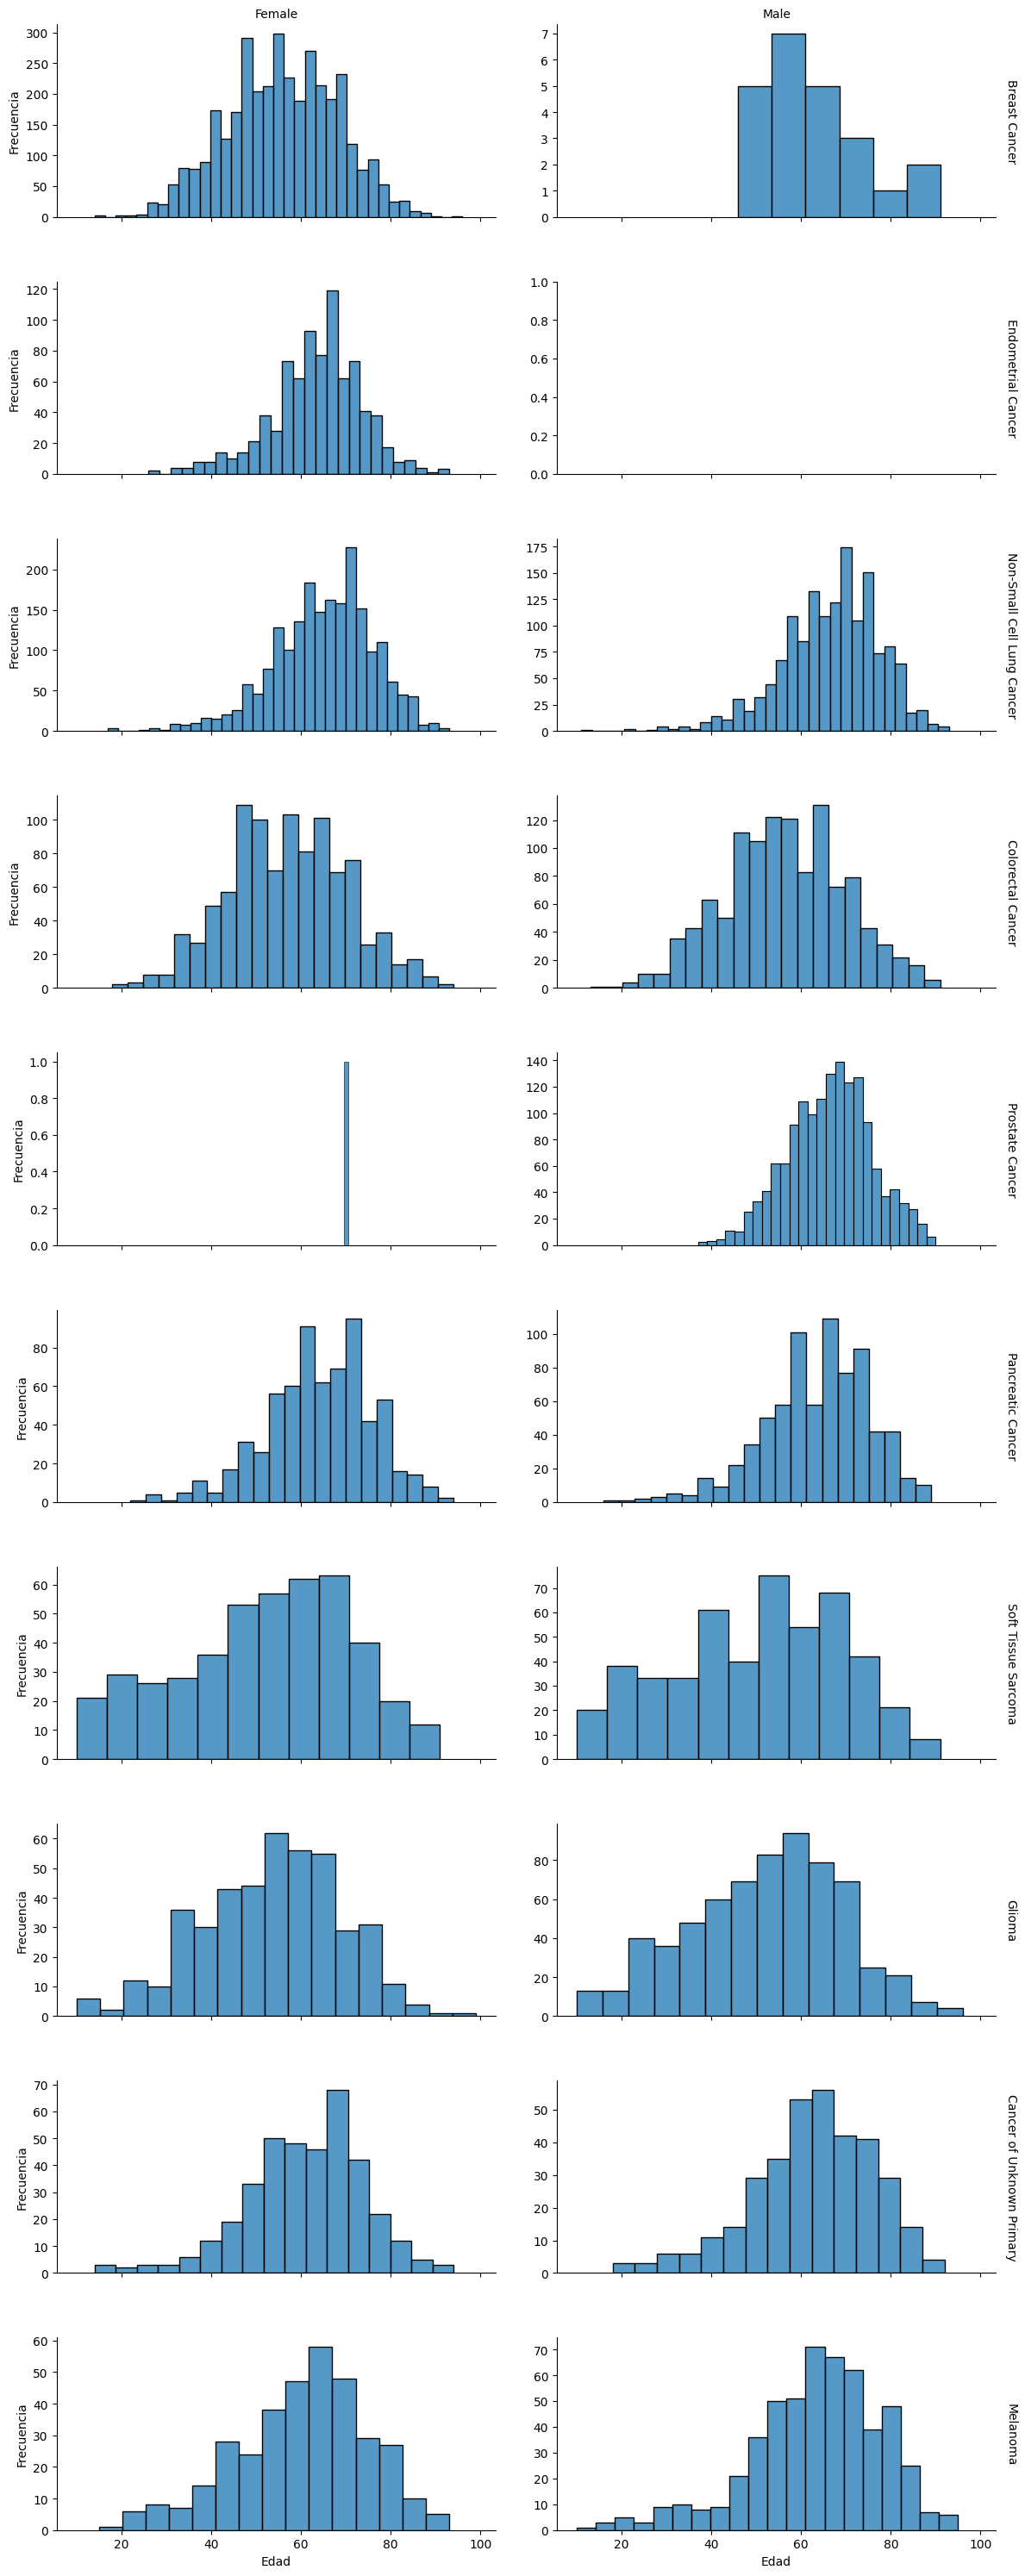

In [24]:
# Primero filtramos para tener los tipos de cáncer más comunes si son muchos
tipos_cancer_comunes = data['Cancer Type'].value_counts().head(10).index
data_filtrada = data[data['Cancer Type'].isin(tipos_cancer_comunes)]

# Usamos FacetGrid para hacer una grilla de histogramas, con un histograma por tipo de cáncer y género
g = sns.FacetGrid(data_filtrada, row='Cancer Type', col='Sex', margin_titles=True, sharey=False, height=3, aspect=2)
g.map(sns.histplot, 'Age')

# Ajustamos los ejes y títulos
g.set_axis_labels('Edad', 'Frecuencia')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Mostramos la grilla de gráficos
plt.show()

En los gráficos se visualizan los 10 tipos de cancer que más se presentan en el estudio, cada histograma muestra la frecuencia de pacientes dentro de varios rangos de edad para un tipo de cáncer y género específico.

In [25]:
# Agrupamos por 'Age', 'Sex', 'Race' y luego contamos las frecuencias de 'Cancer Type'
# Después ordenamos los resultados para ver el tipo de cáncer más común por grupo
grouped = data.groupby(['Age', 'Sex', 'Race'])['Cancer Type'].agg(lambda x: x.value_counts().index[0])

# Convertimos el resultado en un DataFrame para una mejor visualización
most_common_cancer = grouped.reset_index(name='Most Common Cancer Type')

# Mostramos las primeras filas para verificar los resultados
most_common_cancer.head()

,Age,Sex,Race,Most Common Cancer Type
0,8,Female,White,Wilms Tumor
1,10,Female,Asian,Bone Cancer
2,10,Female,Other,Bone Cancer
3,10,Female,Unknown,Glioma
4,10,Female,White,Soft Tissue Sarcoma


Se saca un dataframe con el tipo de cáncer más común por edad, género y raza

In [26]:
# Agrupamos por 'Age' y 'Cancer Type', y luego contamos las frecuencias de 'Treatment Status'
grouped_treatment_status = data.groupby(['Age', 'Cancer Type'])['Treatment Status'].value_counts().unstack(fill_value=0)

# Convertimos el resultado en un DataFrame para una mejor visualización
grouped_treatment_status_df = grouped_treatment_status.reset_index()

# Mostramos las primeras filas para verificar los resultados
grouped_treatment_status_df.head()


Treatment Status,Age,Cancer Type,Treated,Unknown,Untreated
0,8,Wilms Tumor,1,0,0
1,10,Bone Cancer,1,4,0
2,10,CNS Cancer,0,2,1
3,10,Embryonal Tumor,2,3,0
4,10,Germ Cell Tumor,0,2,0


La tabla muestra como varía el estado del tratamiento entre diferentes edades y tipos de cáncer. Se puede ver cuántos pacientes de una determinada edad y con un tipo específico de cáncer están en tratamiento, han completado el tratamiento, o están en alguna otra categoría de estado de tratamiento que no se conoce.

Los datos incluyeron diferentes tipos y subtipos de cáncer, distribución por sexo y edad por tipo de cáncer, y variaron según el estado del tratamiento, el tabaquismo y la raza.

Además de la prevalencia del tabaquismo y el estado del tratamiento, el análisis encontró que ciertos cánceres estaban distribuidos de manera desigual por género y grupo racial. Los cánceres de mama y el de pulmón, son de los más comunes y existen diferencias significativas en la edad en el momento del diagnóstico, lo que sugiere que algunos cánceres son más comunes en determinadas etapas de la vida.

El análisis de estos datos tiene varias aplicaciones prácticas en la vida real como el mejoramiento de politicas de salud pública, mejoramiento de la asignación de recursos, desarrollo de tratamientos médicos, equidad en la atención sanitaria e investigación.

Por ejemplo:
   - Identificar las poblaciones en riesgo y orientar programas de detección temprana y prevención.
   - Asignar de manera eficiente los recursos sanitarios para tratamientos y terapias donde hay mayor necesidad.
   - Fomentar la investigación y el desarrollo de tratamientos que aborden los subtipos de cáncer más comunes y graves.
   - Explorar diferencias en la progresión del cáncer y las tasas de supervivencia entre diversos grupos demográficos.
   - Abordar cualquier disparidad en el tratamiento y el diagnóstico temprano que pueda estar presente entre diferentes grupos raciales y de género.
   - Centros de salud y hospitales pueden usar esta información para mejorar la planificación estratégica en cuanto a especialidades requeridas, educación para el personal médico y apoyo para pacientes y familiares.
